In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
st = pd.read_csv("C:/Users/VISHAL S PANCHANGE/Downloads/50_Startups.csv")
st.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
st.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
st.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


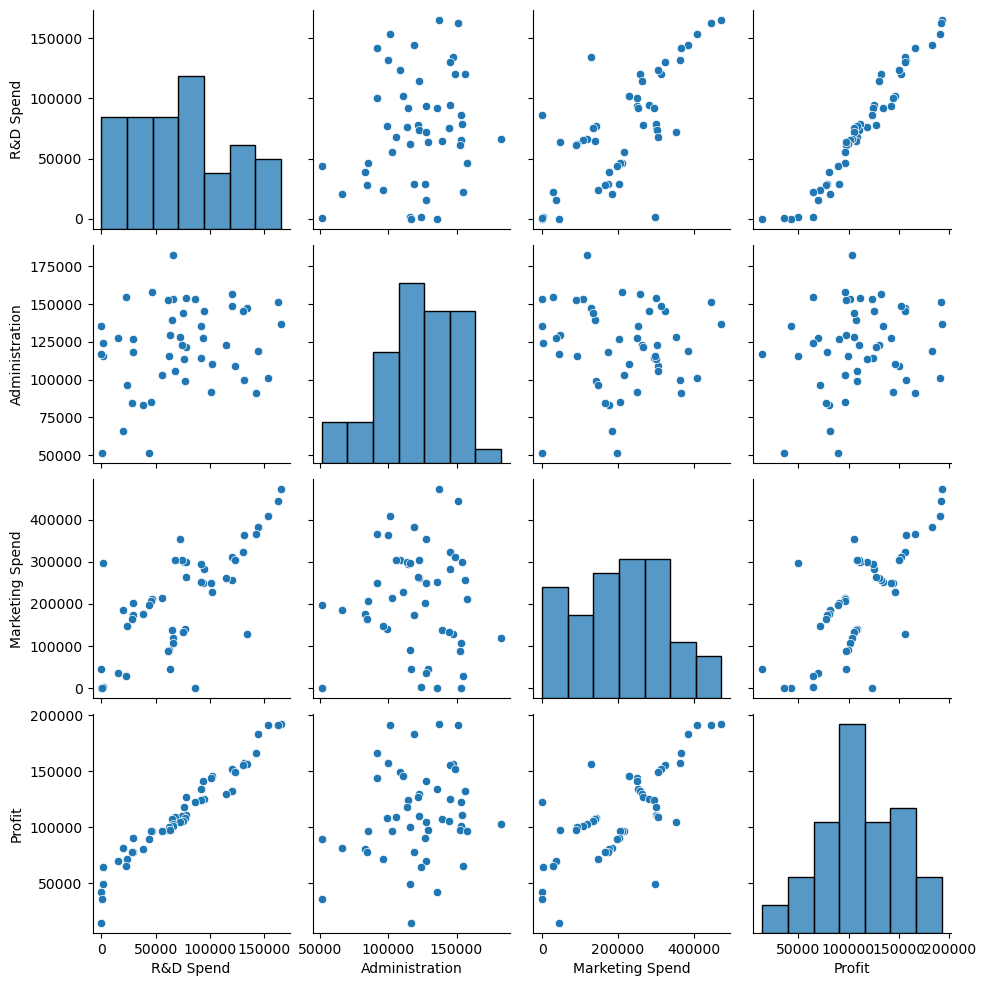

In [6]:
sns.pairplot(st)

In [7]:
st.rename(columns = {'R&D Spend':'RDS','Marketing Spend':'MKS'}, inplace = True)


In [8]:
st.head()

,RDS,Administration,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
model =smf.ols('Profit~RDS+Administration+MKS',data = st).fit()

In [10]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MKS                   0.027228
dtype: float64

In [11]:
model.tvalues, model.pvalues

(Intercept          7.626218
 RDS               17.846374
 Administration    -0.525507
 MKS                1.655077
 dtype: float64,
 Intercept         1.057379e-09
 RDS               2.634968e-22
 Administration    6.017551e-01
 MKS               1.047168e-01
 dtype: float64)

In [12]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [13]:
slr_mks  = smf.ols('Profit~MKS',data = st).fit()
slr_mks.tvalues, slr_mks.pvalues

(Intercept    7.808356
 MKS          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKS          4.381073e-10
 dtype: float64)

In [14]:
slr_ad  = smf.ols('Profit~Administration',data = st).fit()
slr_ad.tvalues, slr_ad.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [15]:
slr_mkad  = smf.ols('Profit~MKS+Administration',data = st).fit()
slr_mkad.tvalues, slr_mkad.pvalues

(Intercept         1.142741
 MKS               8.281039
 Administration    2.467779
 dtype: float64,
 Intercept         2.589341e-01
 MKS               9.727245e-11
 Administration    1.729198e-02
 dtype: float64)

In [16]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_m = smf.ols('MKS~RDS+Administration',data = st).fit().rsquared
vif_m = (1/1-rsq_m)
rsq_rd = smf.ols('RDS~MKS+Administration',data = st).fit().rsquared
vif_rd = (1/1-rsq_rd)
rsq_ad = smf.ols('Administration~RDS+MKS',data = st).fit().rsquared
vif_ad = (1/1-rsq_ad)

data = pd.DataFrame({'VIF':[vif_m,vif_rd,vif_ad]})
data


,VIF
0,0.429780
1,0.405038
2,0.850998


In [17]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

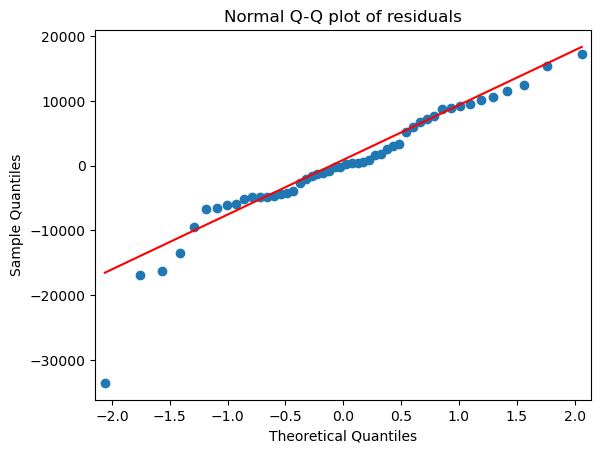

In [18]:
qqplot = sm.qqplot(model.resid,line ='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [20]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

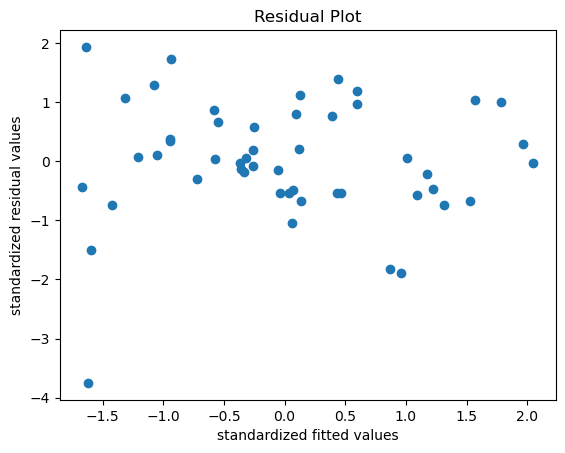

In [21]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid ))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


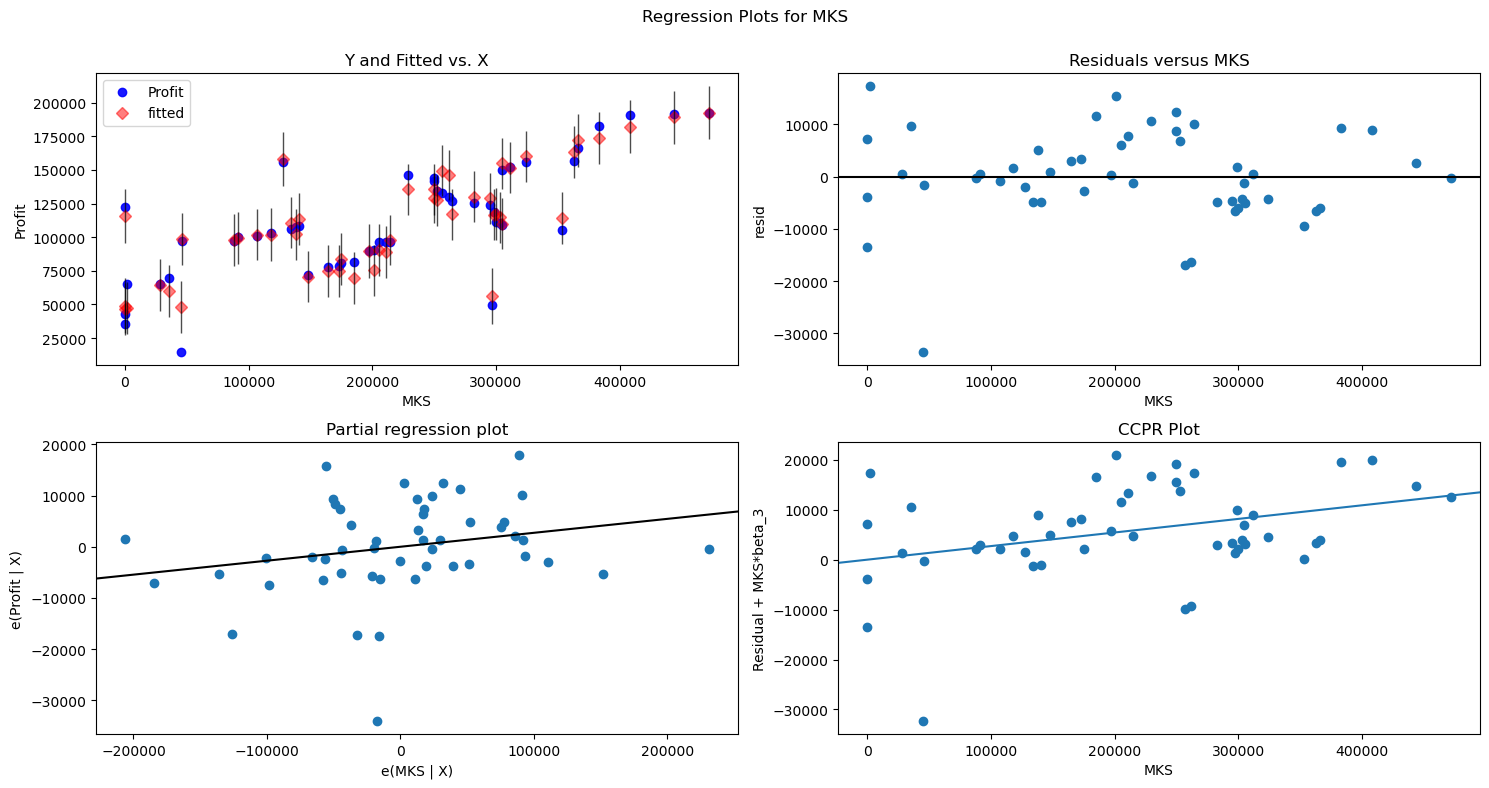

In [22]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,'MKS',fig = fig)
plt.show()

eval_env: 1


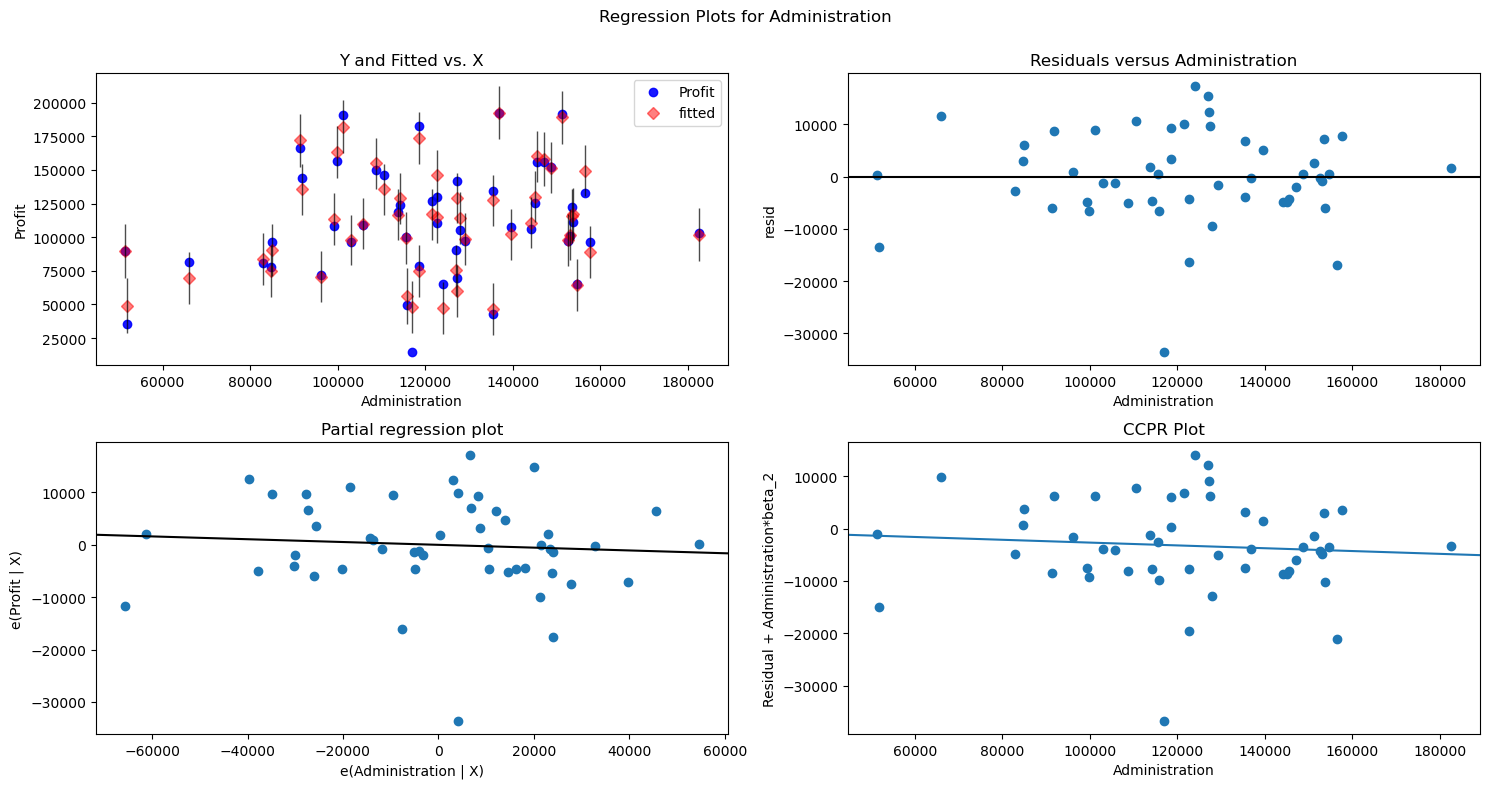

In [23]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,"Administration",fig =fig)
plt.show()

eval_env: 1


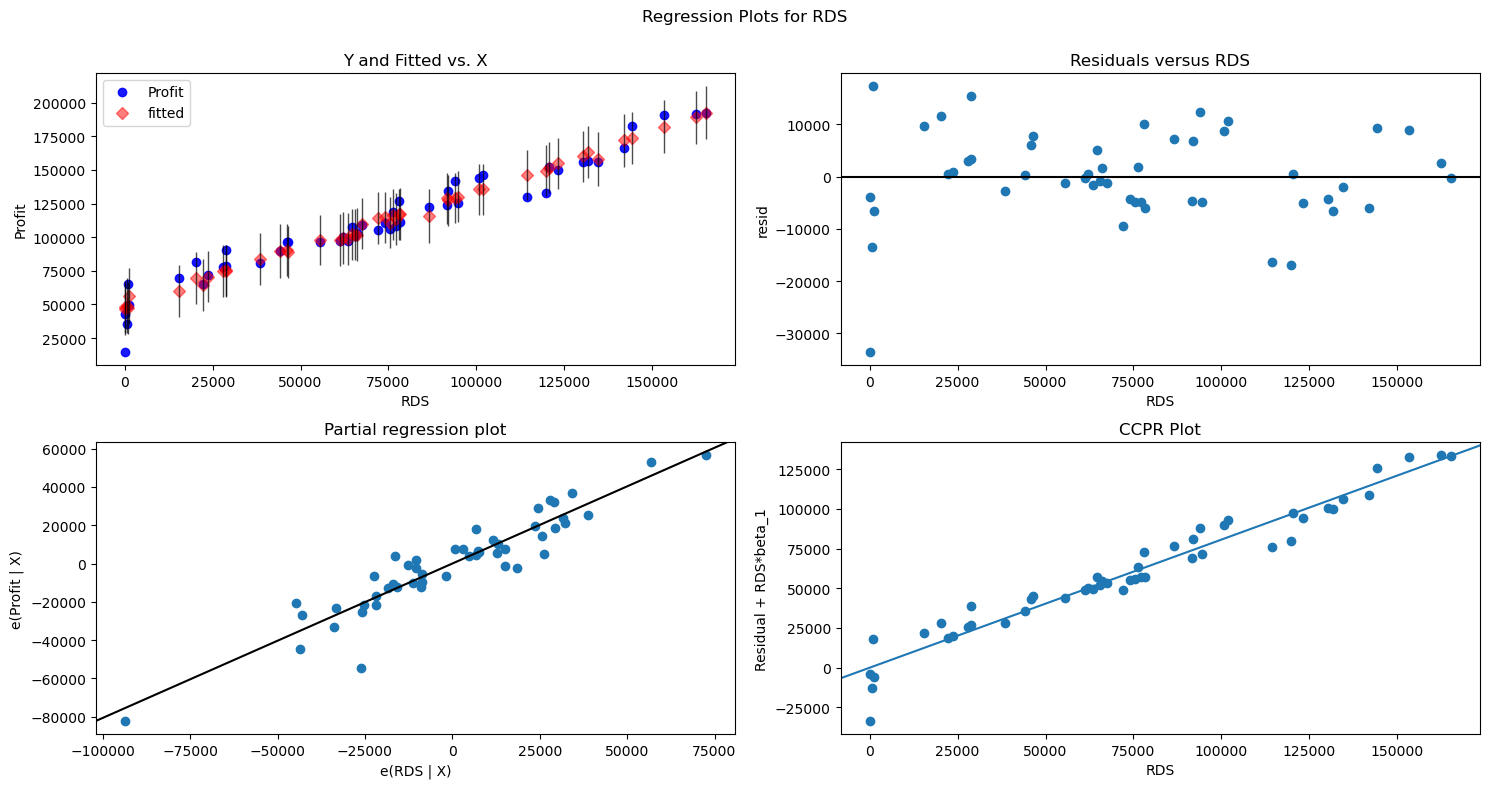

In [24]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model,"RDS",fig =fig)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)
### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [25]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

(c,_) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

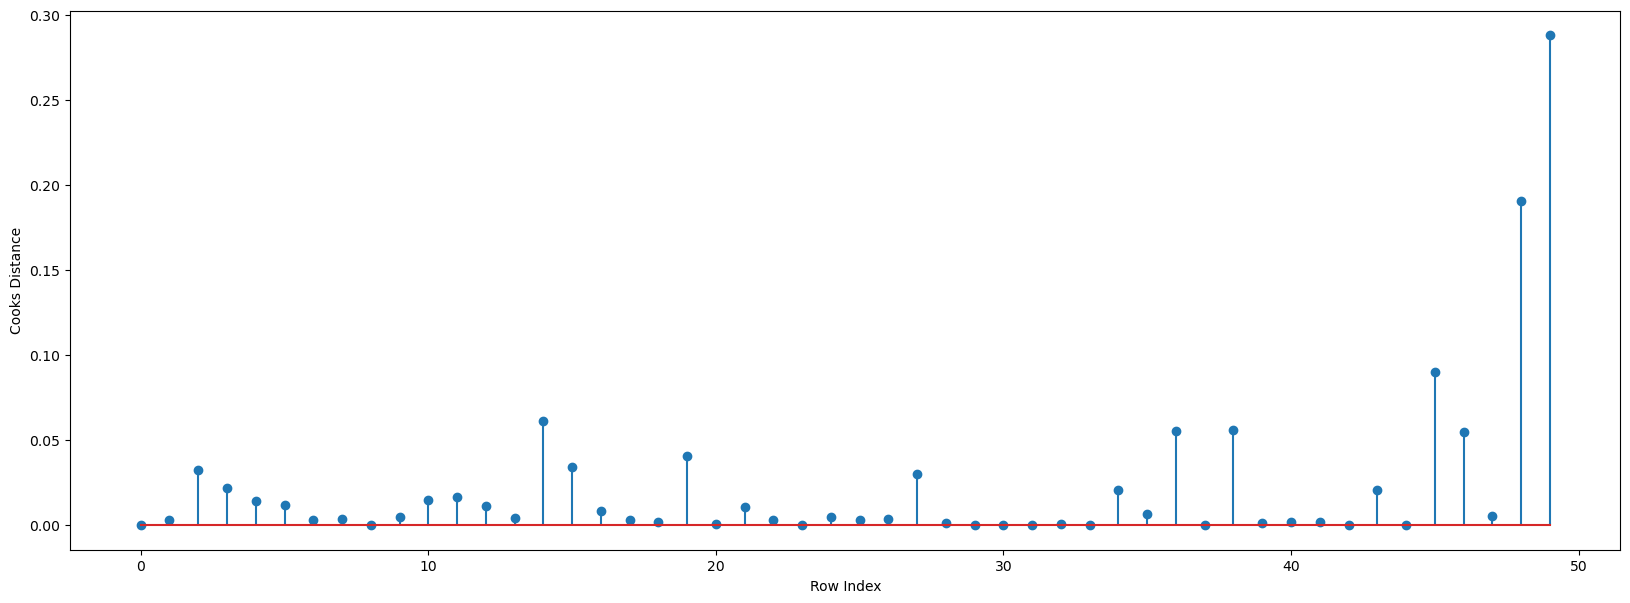

In [26]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(st)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

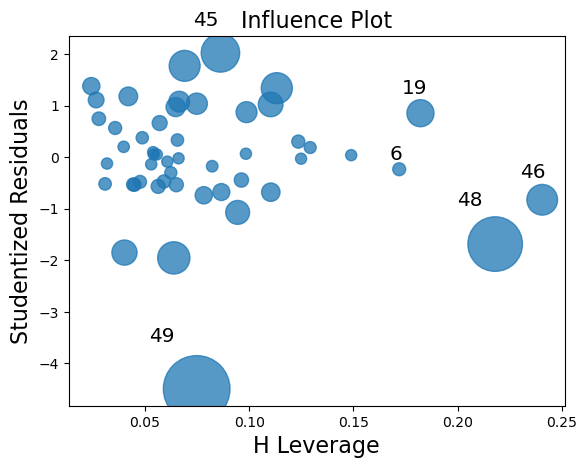

In [28]:
influence_plot(model)
plt.show()

In [29]:
st.shape

(50, 5)

In [30]:
k = st.shape[1]
n = st.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [31]:
st[st.index.isin([49])]

,RDS,Administration,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [32]:
st1 =st.drop(st.index[[49]], axis = 0).reset_index(drop =True)
st1

,RDS,Administration,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
st1.shape

(49, 5)

### Model Deletion Diagnostics and Final Model

In [34]:
model2=smf.ols("Profit~RDS+Administration+MKS",data=st1).fit()

In [66]:
if np.max(c)>0.5:
    model =smf.ols('Profit~RDS+Administration+MKS',data = st1).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    st1 = st1.drop(st1.index(np.argmax(c)), axis = 0).resetindex(drop =True)

else:
     model_final =smf.ols('Profit~RDS+Administration+MKS',data = st1).fit()
     model_final.rsquared, model_final.aic
     print("Thus model accuracy is improved to",model_final.rsquared)
    

Thus model accuracy is improved to 0.9613162435129847


In [67]:
st1

,RDS,Administration,MKS,State,Profit,predict
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110


In [68]:
new_data=pd.DataFrame({'RDS':80000,"Administration":110000,"MKS":130000},index=[0])
new_data

,RDS,Administration,MKS
0,80000,110000,130000


In [69]:
model_final.predict(new_data)

0    115860.809899
dtype: float64

In [70]:
predict = model_final.predict(st1)


In [71]:
st1['predict'] = predict 

In [72]:
st1

,RDS,Administration,MKS,State,Profit,predict
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721
5,131876.90,99814.71,362861.36,New York,156991.12,162582.583177
6,134615.46,147198.87,127716.82,California,156122.51,157741.338633
7,130298.13,145530.06,323876.68,Florida,155752.60,159347.735318
8,120542.52,148718.95,311613.29,New York,152211.77,151328.826941
9,123334.88,108679.17,304981.62,California,149759.96,154236.846778


In [73]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,model_final.rsquared]}
table=pd.DataFrame(d2)
table


,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
